In [1]:
import os

os.environ["HUGGINGFACE_HUB_CACHE"] = "/data/sshadmin/bocheng/.cache/huggingface/hub/"

In [2]:
from diffusers import DiffusionPipeline
import torch

pipe_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = DiffusionPipeline.from_pretrained(pipe_id, torch_dtype=torch.float16).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
pipe.load_lora_weights(
    "CiroN2022/toy-face", weight_name="toy_face_sdxl.safetensors", adapter_name="toy"
)

  0%|          | 0/30 [00:00<?, ?it/s]

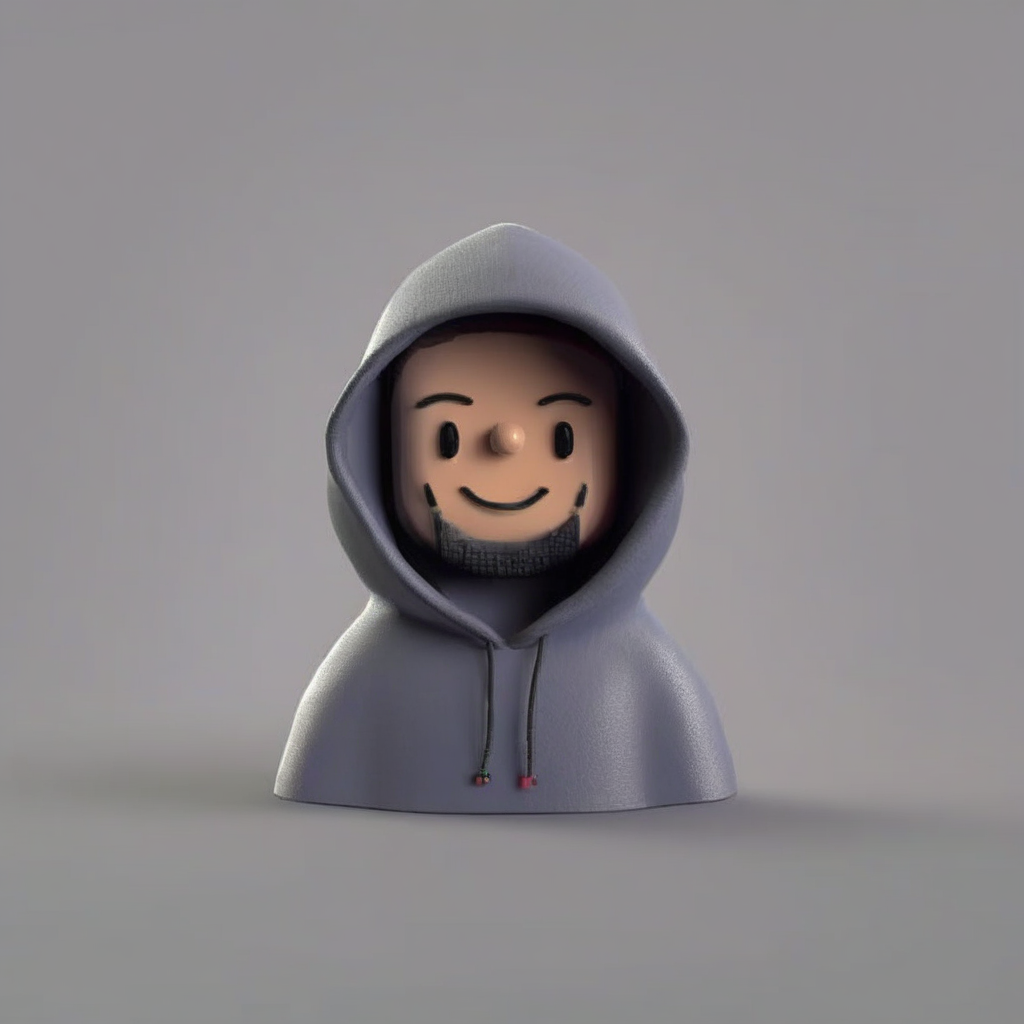

In [4]:
prompt = "toy_face of a hacker with a hoodie"

lora_scale = 0.9
image = pipe(
    prompt,
    num_inference_steps=30,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(0),
).images[0]
image

In [5]:
pipe.load_lora_weights(
    "nerijs/pixel-art-xl", weight_name="pixel-art-xl.safetensors", adapter_name="pixel"
)
pipe.set_adapters("pixel")

  0%|          | 0/30 [00:00<?, ?it/s]

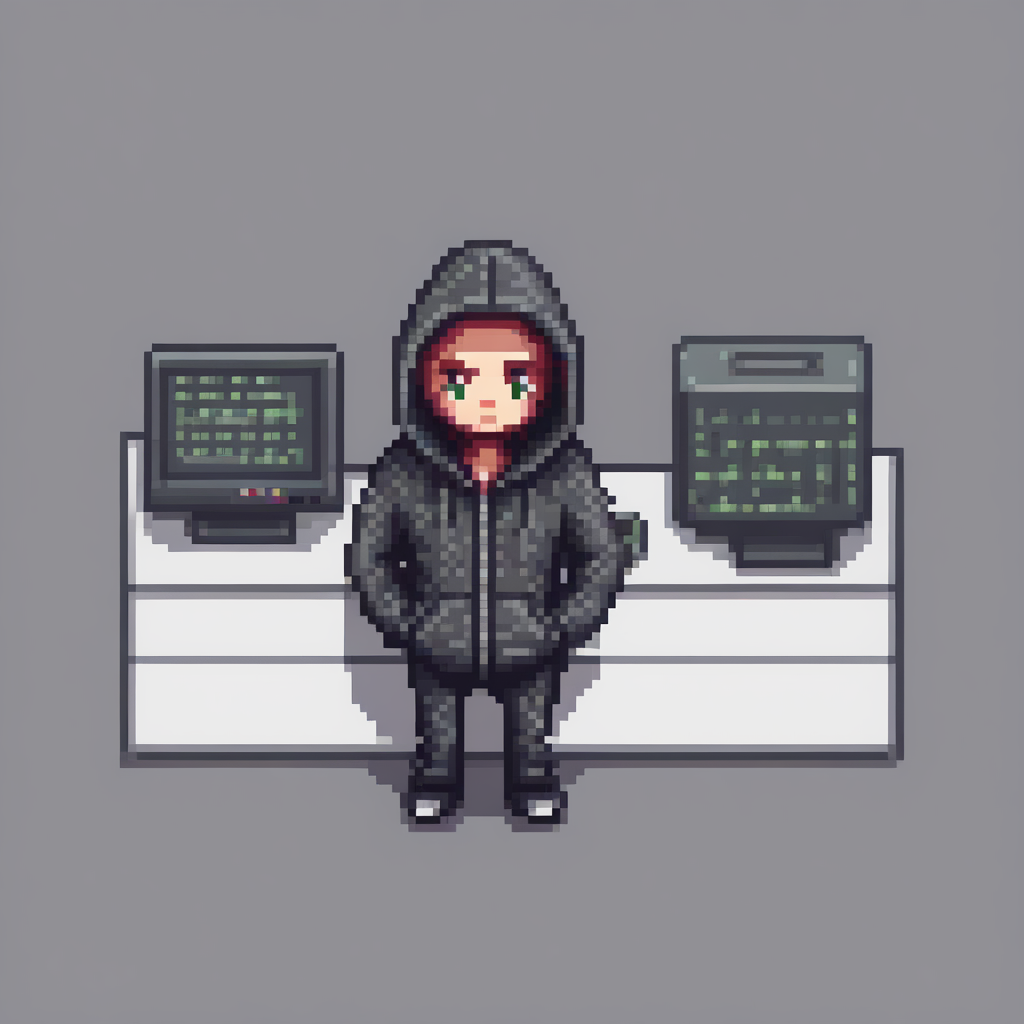

In [6]:
prompt = "a hacker with a hoodie, pixel art"
image = pipe(
    prompt,
    num_inference_steps=30,
    cross_attention_kwargs={"scale": lora_scale},
    generator=torch.manual_seed(0),
).images[0]
image

  0%|          | 0/30 [00:00<?, ?it/s]

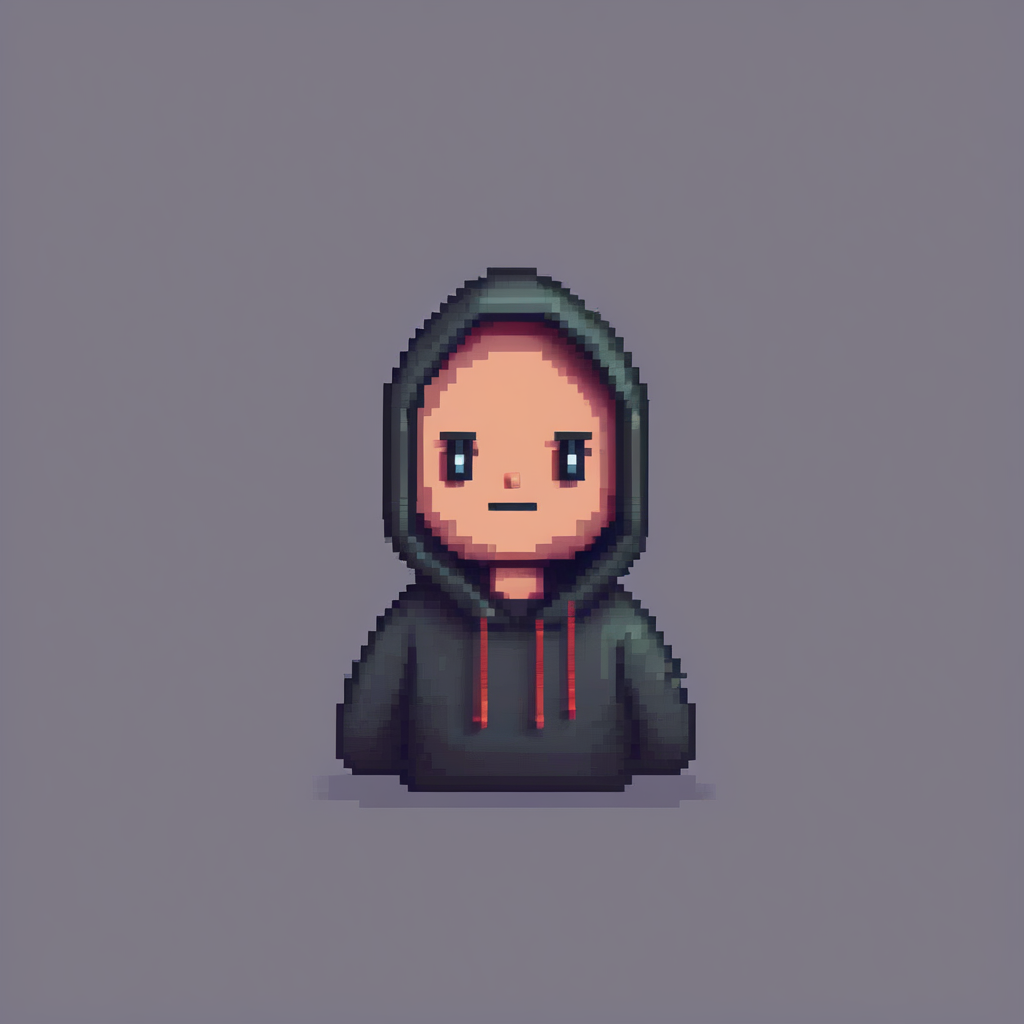

In [7]:
pipe.set_adapters(["pixel", "toy"], adapter_weights=[0.5, 1.0])
# Notice how the prompt is constructed.
prompt = "toy_face of a hacker with a hoodie, pixel art"
image = pipe(
    prompt,
    num_inference_steps=30,
    cross_attention_kwargs={"scale": 1.0},
    generator=torch.manual_seed(0),
).images[0]
image

  0%|          | 0/30 [00:00<?, ?it/s]

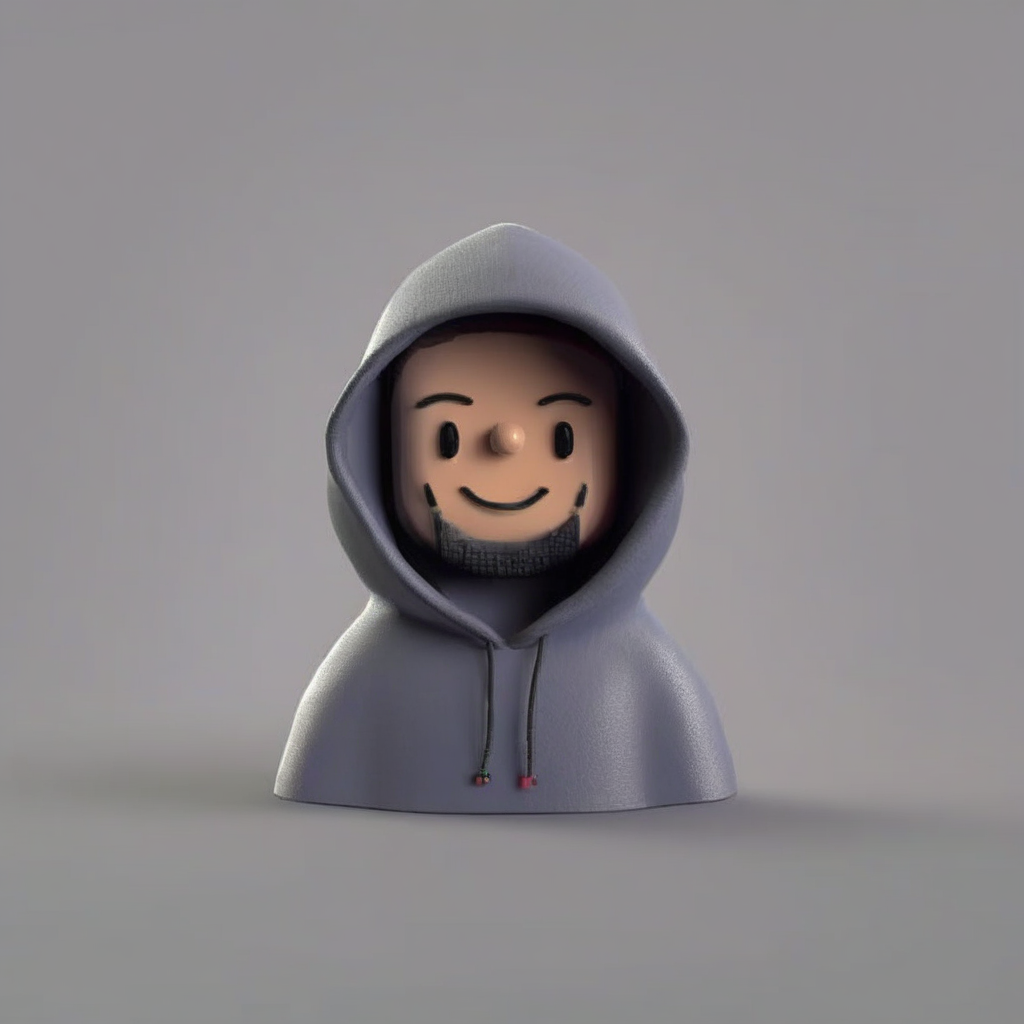

In [8]:
pipe.set_adapters("toy")
prompt = "toy_face of a hacker with a hoodie"
lora_scale=0.9
image=pipe(prompt,num_inference_steps=30,cross_attention_kwargs={"scale":lora_scale},generator=torch.manual_seed(0)).images[0]
image


  0%|          | 0/30 [00:00<?, ?it/s]

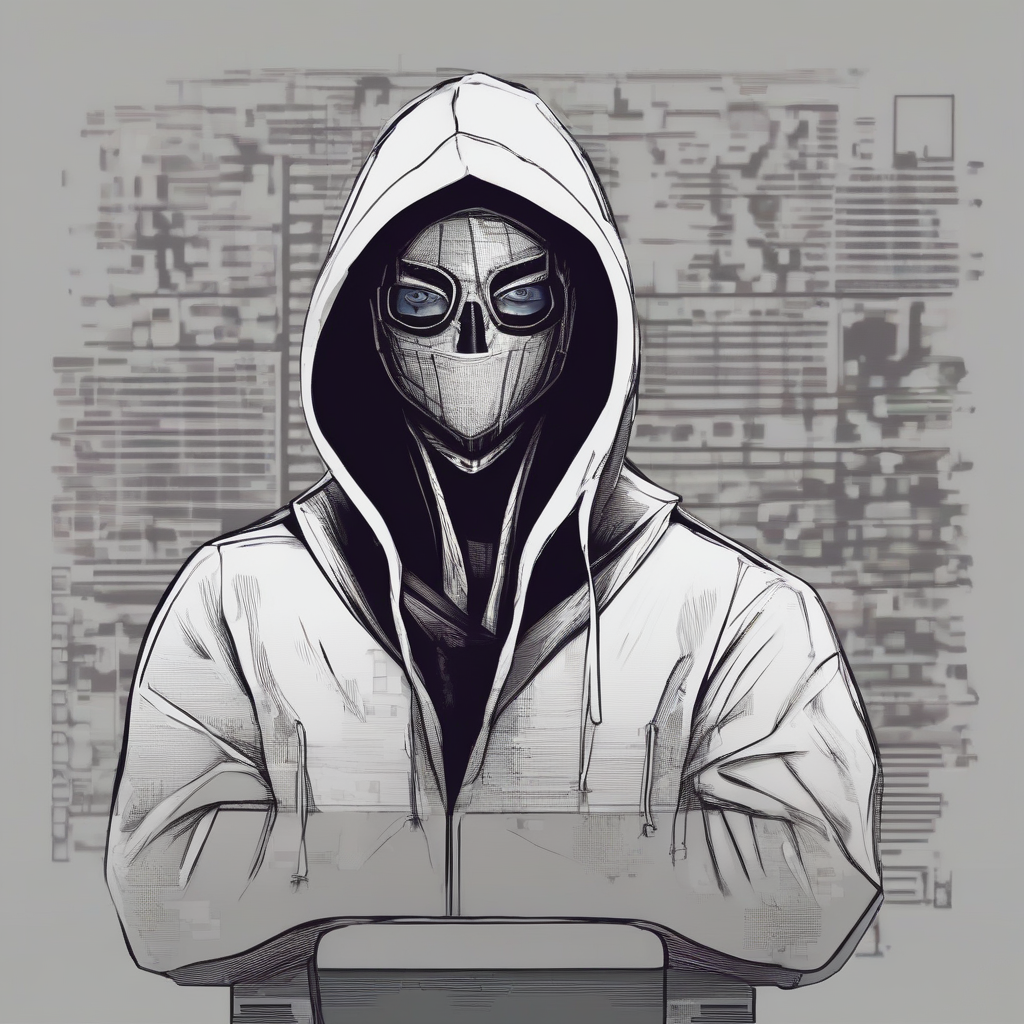

In [9]:
pipe.disable_lora()
prompt = "toy_face of a hacker with a hoodie"
lora_scale = 0.9
image = pipe(prompt, num_inference_steps=30, generator=torch.manual_seed(0)).images[0]
image

In [15]:
active_adapters=pipe.get_active_adapters()
active_adapters

['pixel', 'toy']

In [11]:
list_adapters_component_wise=pipe.get_list_adapters()
list_adapters_component_wise

{'unet': ['toy', 'pixel']}

In [14]:
# pipe.load_lora_weights(
#     "nerijs/pixel-art-xl", weight_name="pixel-art-xl.safetensors", adapter_name="pixel"
# )
# pipe.load_lora_weights(
#     "CiroN2022/toy-face", weight_name="toy_face_sdxl.safetensors", adapter_name="toy"
# )

pipe.set_adapters(["pixel", "toy"], adapter_weights=[0.5, 1.0])
# Fuses the LoRAs into the Unet
pipe.fuse_lora()
prompt = "toy_face of a hacker with a hoodie, pixel art"
image = pipe(prompt, num_inference_steps=30, generator=torch.manual_seed(0)).images[0]

# Gets the Unet back to the original state
pipe.unfuse_lora()

  0%|          | 0/30 [00:00<?, ?it/s]

/data/sshadmin/bocheng/soft/installed/miniconda3/envs/torch/lib/python3.11/site-packages/peft/tuners/lora/layer.py:313: UserWarning: Already unmerged. Nothing to do.
  warnings.warn("Already unmerged. Nothing to do.")
